In [19]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

Hay un concepto llamado Grid, se construye como el producto cartesiano entre conjunto, en nuestro caso es acerca de los hiperparamentos

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

El objetivo es clasificar el siguiente conjunto de datos encontrando el mejor ajuste en esta malla (Grid).

In [7]:
df = pd.read_excel("../Aprendizaje_Automatico/data/hlamos_kellogs3.xlsx")
df

,Calorias,proteina,grasa,carbohidratos,azucar,potasio,grupo
0,50,1,0,13.0,0,15,quaker
1,50,2,0,10.0,0,50,quaker
2,110,6,2,17.0,1,105,general mills
3,100,5,2,1.0,1,110,quaker
4,100,2,0,21.0,2,35,Kellogs
5,90,3,0,18.0,2,90,Kellogs
6,110,2,1,21.0,3,40,general mills
7,110,2,1,21.0,3,35,general mills
8,100,3,1,16.0,3,110,general mills
9,100,3,1,17.0,3,110,general mills


<AxesSubplot:>

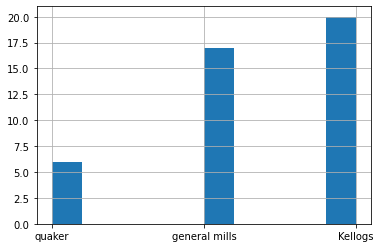

In [22]:
df["grupo"].hist()

Procederemos a definir  de forma aleatoria el conjunto de entrenamiento y el conjunto de test (20%) para posteriormente hacer una busqueda del mejor estimador en una malla donde se varia gamma, C y el kernel

In [29]:
X, y = df.values[:,:-1], df.values[:,-1]
print(f'Data shape, X: {X.shape}, y: {y.shape}')

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state = 42)


param_grid = {'C': [0.1,1, 10, 100, 1000], 
              'gamma': [1,0.1,0.01,0.001, 0.0001],
              'kernel': ['linear','rbf', 'poly', 'sigmoid']}
              
grid = GridSearchCV(SVC(), #model
                    param_grid, #Grid
                    verbose = 3)              

grid.fit(X_train, y_train)


Data shape, X: (43, 6), y: (43,)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.714 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.429 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.429 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.286 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.333 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.429 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.429 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.429 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.714 total time=   0.5s
[CV 2/5] END 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

De las anteriores posibilidades, vemos que el mejor resulta ser utilizando 

gamma = 1

C = 10

Kernel lineal

In [30]:
# print(grid.best_params_)
# print(grid.classes_)
print(grid.best_estimator_)
print(grid.best_score_)


SVC(C=10, gamma=1, kernel='linear')
0.7095238095238096


Ahora validandolo con el conjunto de entrenamiento vemos que alcanza un 56%, mostrando probablemente un overfitting

In [31]:
y_pred = grid.predict(X_test)
print(classification_report(y_test,y_pred))


               precision    recall  f1-score   support

      Kellogs       0.75      0.60      0.67         5
general mills       0.50      0.50      0.50         4
       quaker       0.00      0.00      0.00         0

     accuracy                           0.56         9
    macro avg       0.42      0.37      0.39         9
 weighted avg       0.64      0.56      0.59         9



/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
